In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [38]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [39]:
#########################
# shape of dataframe
#########################
df.shape

(2535, 14)

In [40]:
#########################
# Checking for missing values in dataframe
#########################
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [41]:
df.dropna(inplace=True)

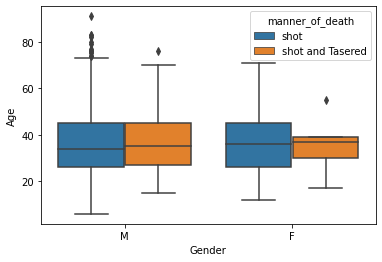

In [42]:
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=df)
plt.xlabel("Gender")
plt.ylabel("Age");



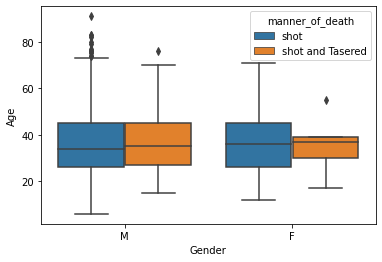

In [43]:
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=df)
plt.xlabel("Gender")
plt.ylabel("Age");

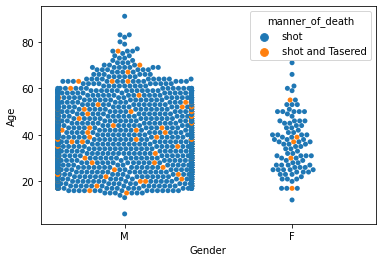

In [44]:
sns.swarmplot (x='gender', y='age', hue='manner_of_death', data=df)
plt.xlabel("Gender")
plt.ylabel("Age");

In [45]:
cities_freq= df['city'].value_counts().head(12)  #[:12]
cities_freq

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
Indianapolis     14
St. Louis        14
Oklahoma City    13
Name: city, dtype: int64

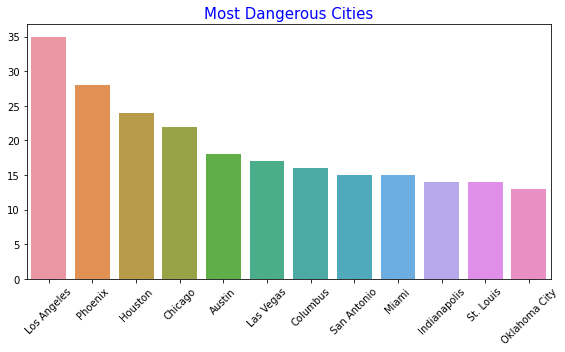

In [46]:
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=cities_freq.index, y=cities_freq.values)
ax.set_xticklabels(cities_freq.index, rotation = 45)
ax.set_title('Most Dangerous Cities',color = 'blue',fontsize=15)
plt.tight_layout();

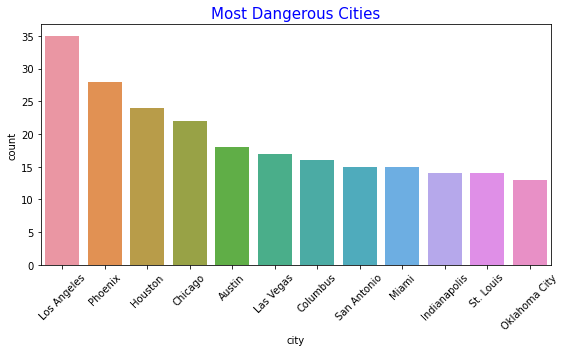

In [47]:
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=df,
             order=cities_freq.index,
             )
ax.set_xticklabels(cities_freq.index, rotation = 45)
ax.set_title('Most Dangerous Cities',color = 'blue',fontsize=15)
plt.tight_layout();

In [48]:
dangerous_states = df['state'].value_counts().head(20) #[:20]
dangerous_states



CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
PA     45
AL     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

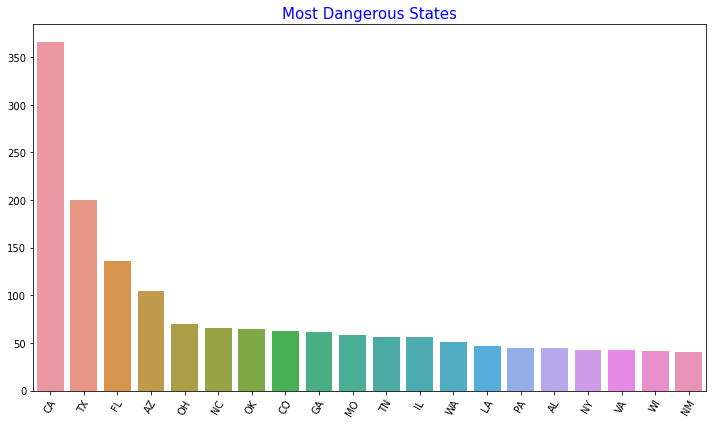

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x = dangerous_states.index, y = dangerous_states.values)
plt.xticks(rotation=60)
plt.title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()

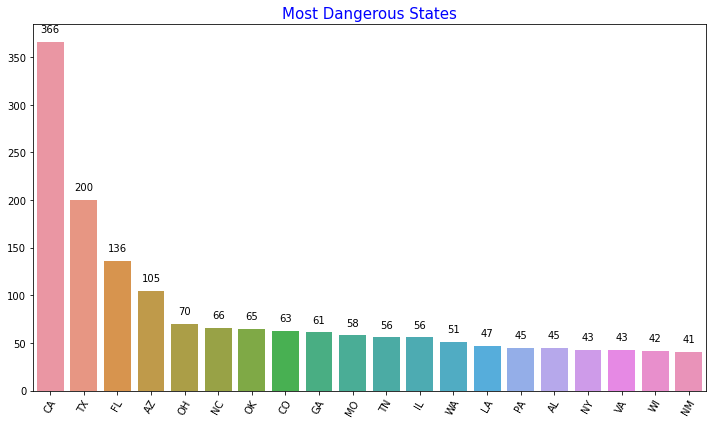

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x = dangerous_states.index, y = dangerous_states.values)
plt.xticks(rotation=60)
plt.title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()
for index,value in enumerate(df['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center')



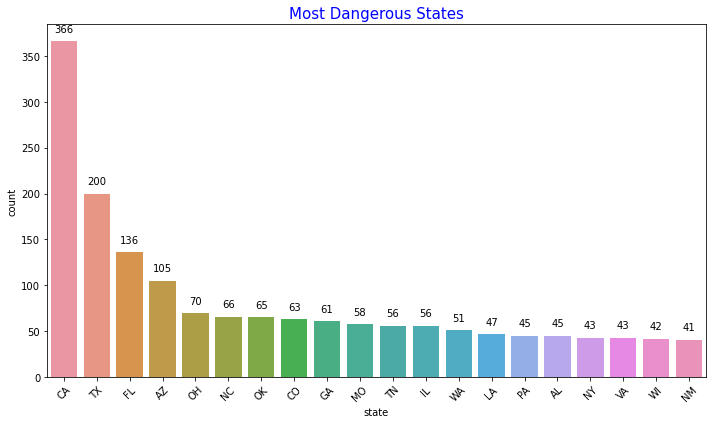

In [52]:
####################################
# with seaborn countplot
####################################
fig, ax =plt.subplots(figsize=(10,6))
sns.countplot(x="state", data=df,
             order=dangerous_states.index,
             )
ax.set_xticklabels(dangerous_states.index, rotation = 45)
ax.set_title('Most Dangerous States',color = 'blue',fontsize=15)
plt.tight_layout()
for index,value in enumerate(df['state'].value_counts().head(20)):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

In [53]:
df["signs_of_mental_illness"].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

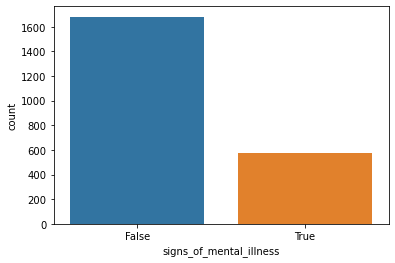

In [54]:
####################################
# with seaborn
####################################
sns.countplot(x = df["signs_of_mental_illness"]);

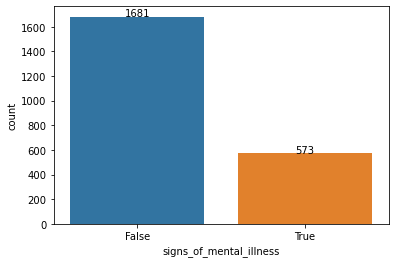

In [55]:
sns.countplot(x = "signs_of_mental_illness", order = df.signs_of_mental_illness.value_counts().index, data =df)
for index, value in enumerate(df.signs_of_mental_illness.value_counts()):
  plt.text(index,value + 1,str(value), ha = "center" )
plt.show()



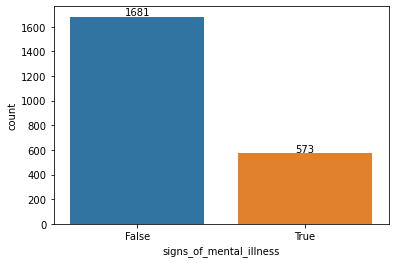

In [56]:
####################################
# with seaborn
####################################
sns.countplot(x = df["signs_of_mental_illness"]);
for index,value in enumerate(df["signs_of_mental_illness"].value_counts()):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

In [57]:
df['threat_level'].value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

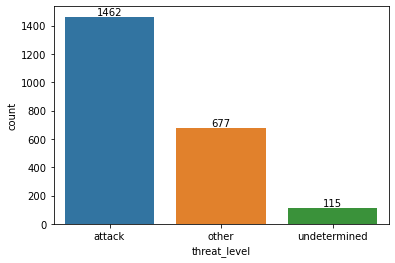

In [58]:
####################################
# with seaborn
####################################
sns.countplot(x=df['threat_level'])
for index,value in enumerate(df['threat_level'].value_counts()):
    plt.text(x=index , y =value+10 ,s=f"{value}" ,horizontalalignment='center');

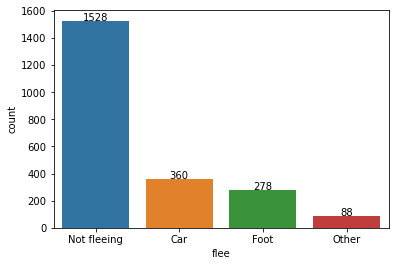

In [59]:
# with seaborn
sns.countplot(x = "flee", order = df.flee.value_counts().index, data = df);
for index, value in enumerate(df.flee.value_counts()):
  plt.text(index,value + 1,str(value), ha = "center" )
plt.show()